## <font color=red> Reading data and creating required columns

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [201]:
data = pd.read_csv('ENB2012_data.csv')

In [202]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [203]:
data.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation",
               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [204]:
data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [205]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [206]:
data.shape

(768, 10)

In [207]:
pd.isnull(data).sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

## Adding column for overall load

In [208]:
data['Overall Load'] = data['Heating Load'] + data['Cooling Load']
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


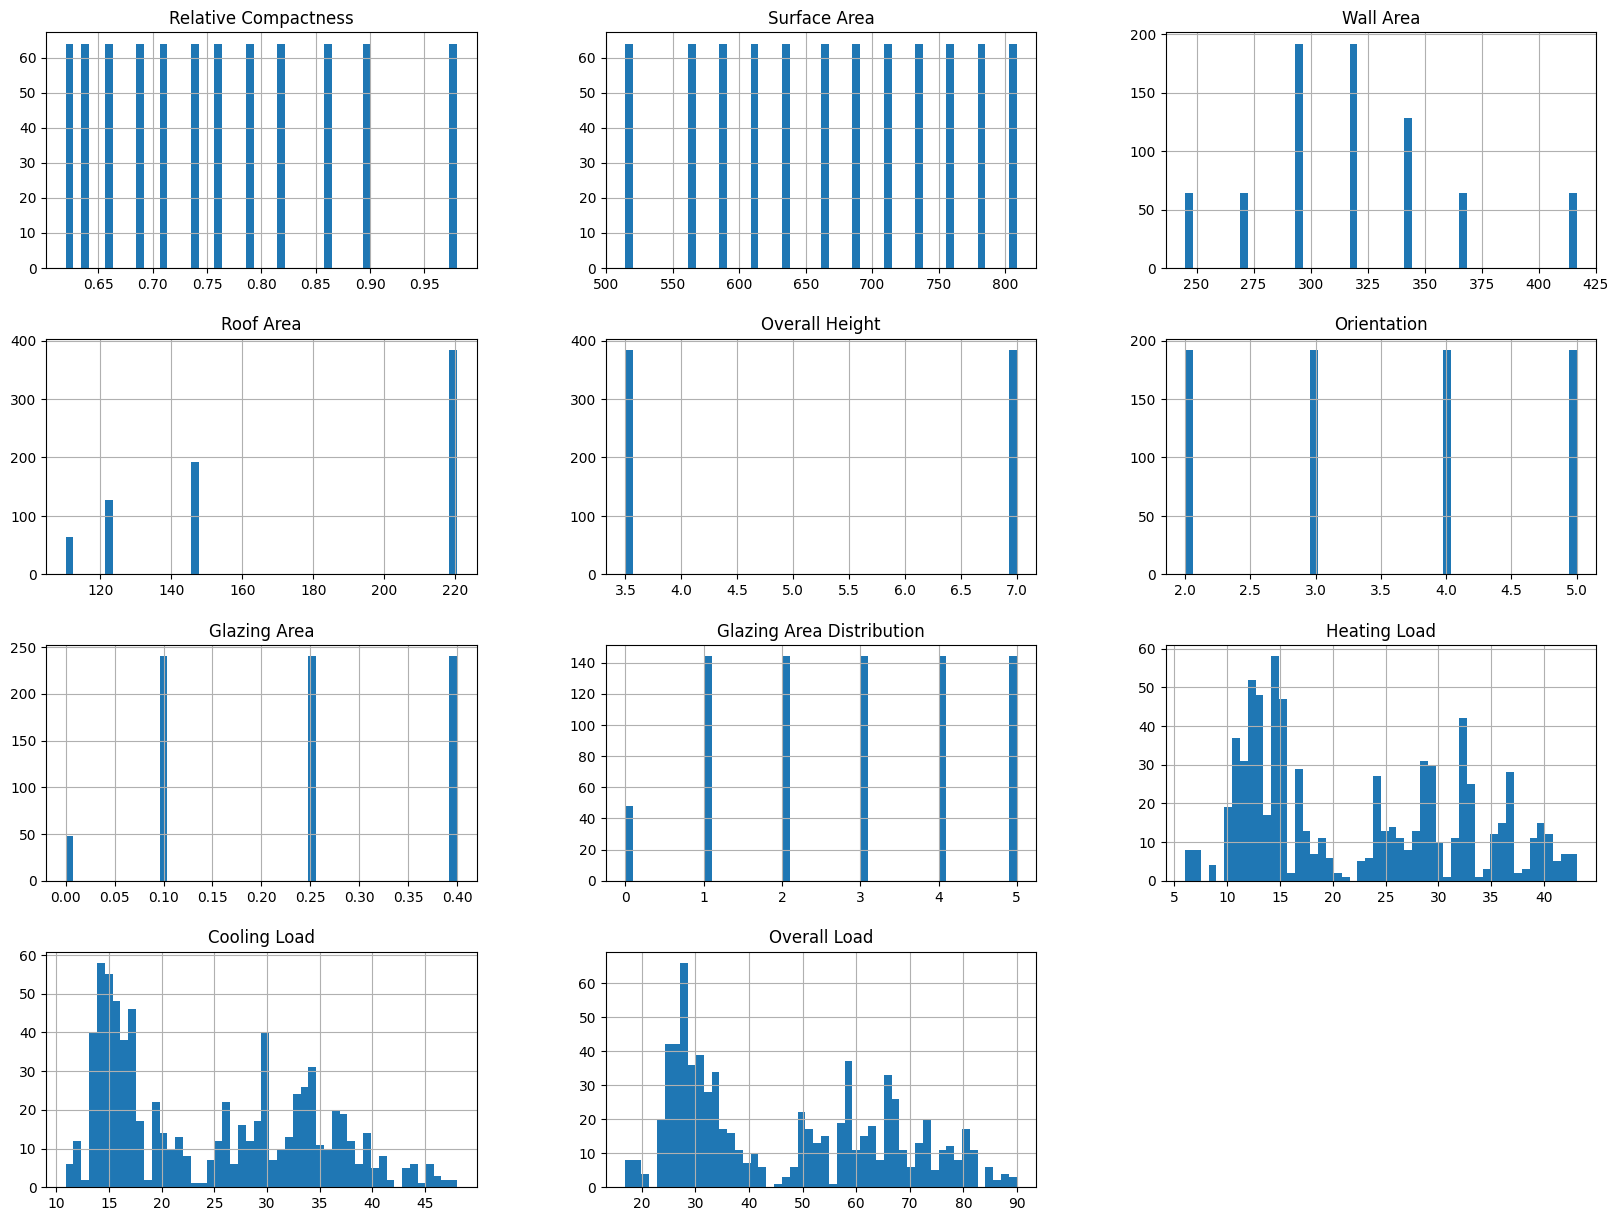

In [209]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [210]:
data.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339,0.631950
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999,-0.669389
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117,0.444502
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547,-0.867423
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785,0.897945
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290,0.005637
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505,0.241048
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525,0.069911
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862,0.994299
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000,0.993585


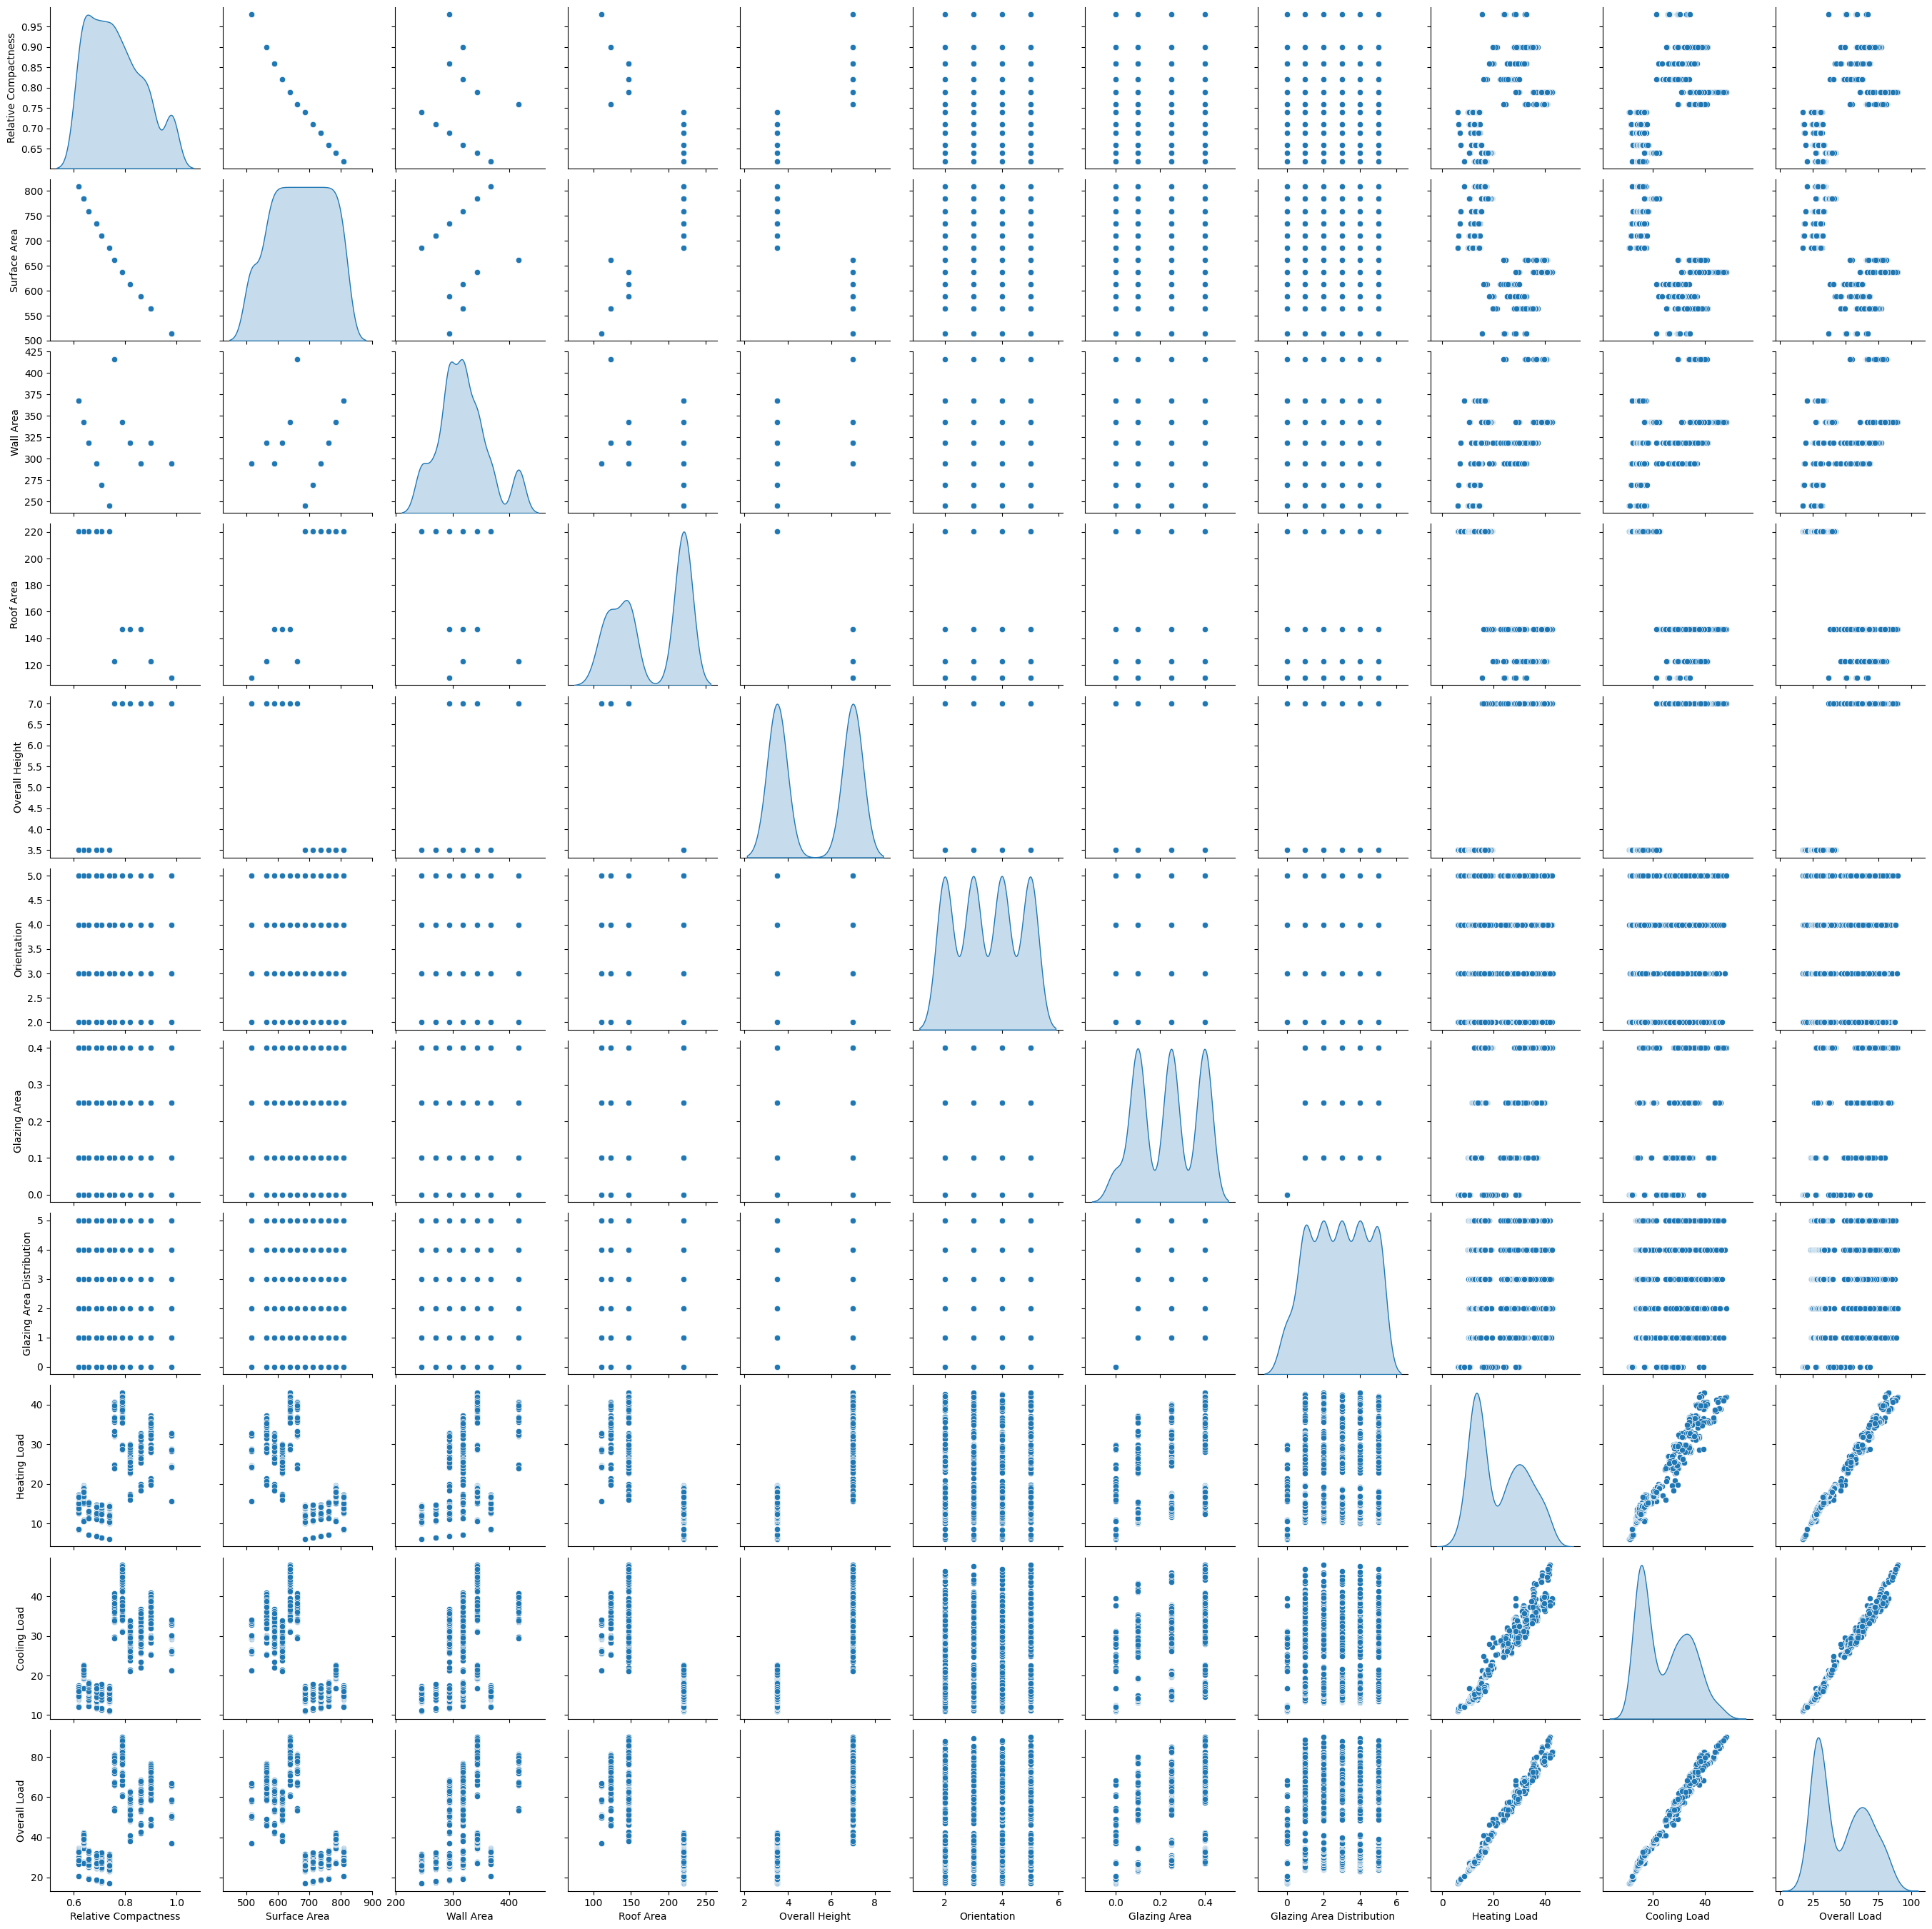

In [211]:
sns.pairplot(data, kind="scatter", diag_kind='kde')

<Axes: >

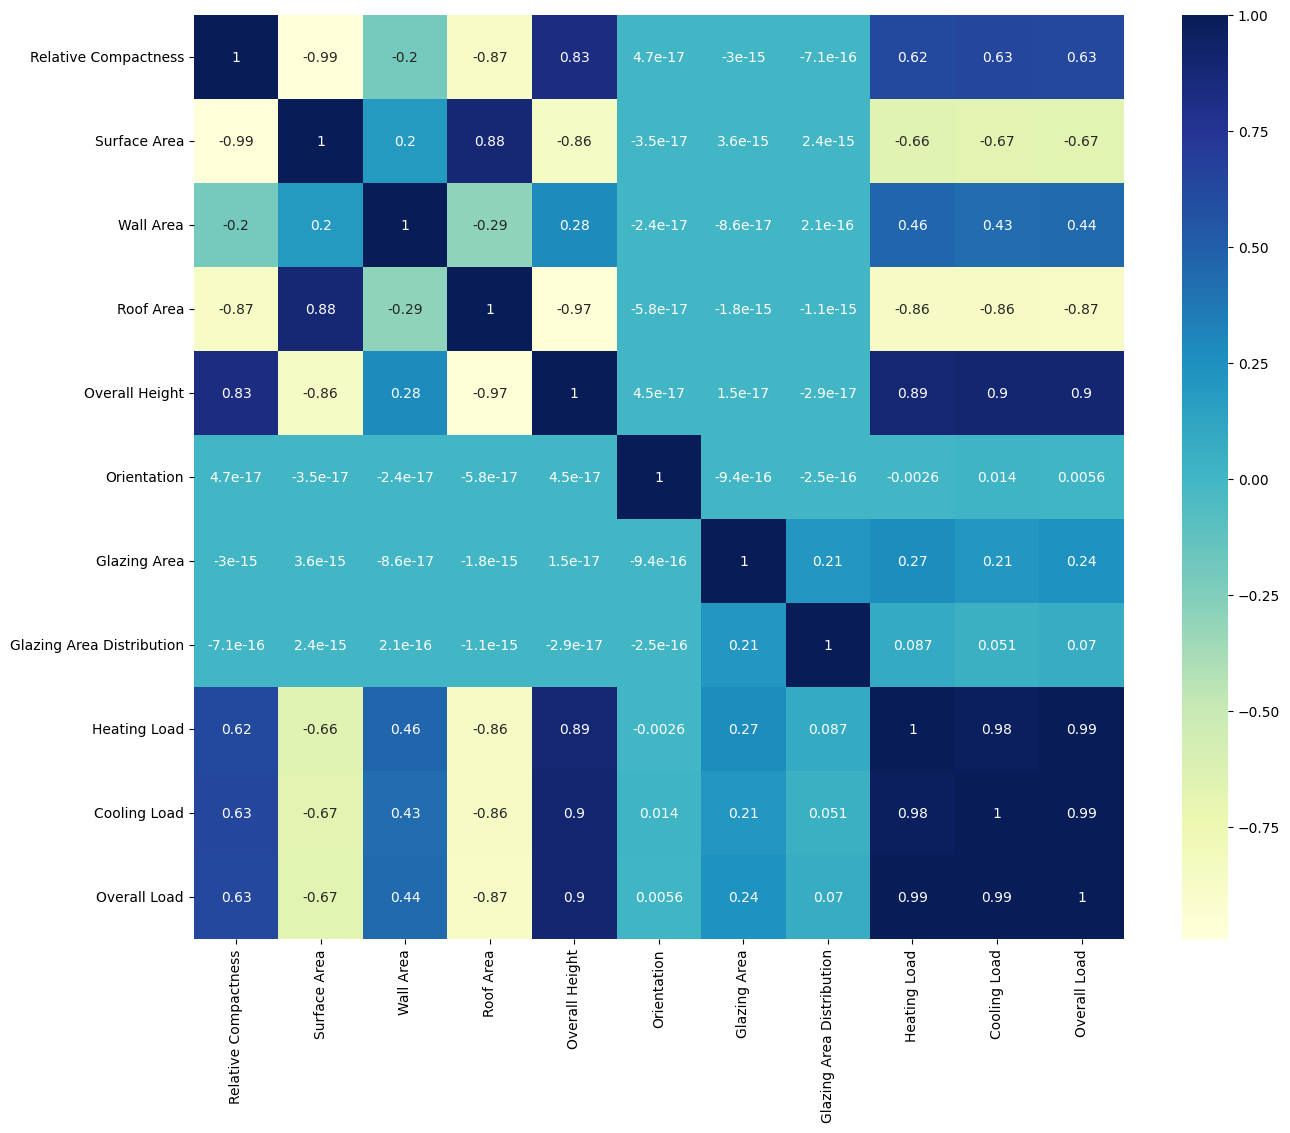

In [212]:
plt.subplots(figsize=(15,12))
corr = data.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

## Trend of overall load

<Axes: xlabel='Overall Load', ylabel='Density'>

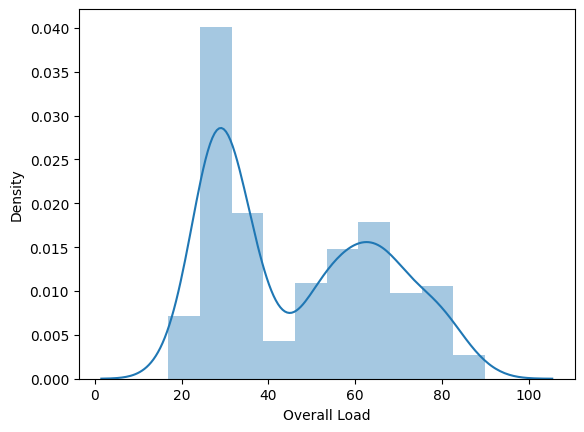

In [213]:
sns.distplot(data['Overall Load'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b3ffb3440a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b3ffb3445e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b3ffb31ae00>],
 'medians': [<matplotlib.lines.Line2D at 0x7b3ffb344b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b3ffb344dc0>],
 'means': []}

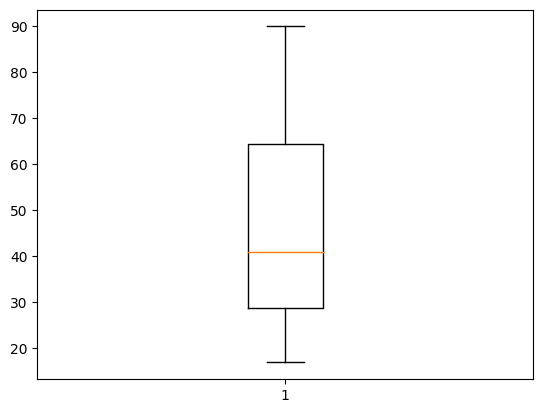

In [214]:
plt.boxplot(data['Overall Load'])

In [215]:
data['Overall Load'].quantile([.25, .50, 0.75])

0.25    28.750
0.50    40.970
0.75    64.335
Name: Overall Load, dtype: float64

## Adding column for classes for efficiency

In [216]:
data['Efficiency'] = np.where(data['Overall Load']<29, 'Low', np.where(data['Overall Load']<64, 'Average', 'High'))
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Overall Load,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,Average


In [217]:
data.shape

(768, 12)

In [218]:
data['Efficiency'].value_counts()

Average    368
Low        207
High       193
Name: Efficiency, dtype: int64

<Axes: xlabel='Efficiency', ylabel='count'>

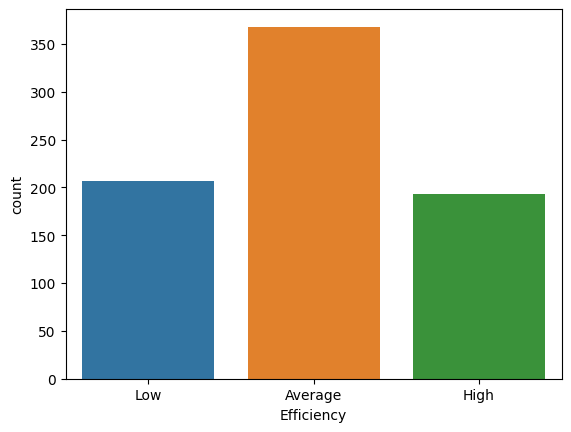

In [219]:
sns.countplot(x='Efficiency', data=data, order=['Low','Average','High'])

## <font color=red> Creating different datasets for different Y variables

## Data set for heating load

In [220]:
data_heat = data.drop(columns=['Cooling Load','Overall Load','Efficiency'])

In [221]:
data_heat.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [222]:
data_heat.shape

(768, 9)

## Data set for cooling load

In [223]:
data_cool = data.drop(columns=['Heating Load','Overall Load','Efficiency'])
data_cool.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [224]:
data_cool.shape

(768, 9)

## Data set for efficiency classification

In [225]:
data_eff = data.drop(columns=['Cooling Load','Heating Load','Overall Load'])
data_eff.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Efficiency
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Average


## <font color=red> Models for predicting heating load

## Data preprocessing

In [226]:
X = data_heat.drop(columns=['Heating Load'])
y= data_heat['Heating Load']

In [227]:
X.shape

(768, 8)

In [228]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating Load, dtype: float64

In [229]:
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train_heat = scaler.fit_transform(X_train_heat)
X_test_heat = scaler.transform(X_test_heat)

In [230]:
import joblib
scaler_filename = "scaler.pkl"
joblib.dump(scaler, scaler_filename)

['scaler.pkl']

## Neural Network Regressor

### Grid Search to find the Best Parameters for Nueral Network

In [231]:
# ## Neural Network Regressor with Parameter tuning
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# Build the neural network regressor function to be used in the keras-sklearn wrapper
# def build_reg(optimizer):
#    nn_reg = Sequential()
#    nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
#    nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
#    nn_reg.add(Dense(1, activation='linear'))

#    nn_reg.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
#    return nn_reg

#    nn_reg = KerasRegressor(build_fn=build_reg)

# param_grid = {'batch_size': [10,16,25],
#          'epochs': [50,75, 100],
#          'optimizer': ['rmsprop','adam']}

# nn_reg_grid_heat = GridSearchCV(estimator=nn_reg, param_grid=param_grid, scoring='r2', cv=8)

# nn_reg_grid_heat.fit(X_train, y_train)

### Best Parameters : - Batch Size= 10 , Epochs= 100, Optimizer= 'rmsprop'

In [232]:
from keras.models import Sequential
from keras.layers import Dense

nn_reg = Sequential()
nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(1, activation='linear'))

nn_reg.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

nn_reg.fit(X_train_heat, y_train_heat, batch_size=10, epochs=100)

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 587.2802 - mse: 587.2802
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 584.7050 - mse: 584.7050
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 582.1899 - mse: 582.1899
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 579.6516 - mse: 579.6516
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 577.1672 - mse: 577.1672
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 574.6424 - mse: 574.6424
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 572.1426 - mse: 572.1426
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 569.6506 - mse: 569.6506
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 567.2298 - mse: 567.2298
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 564.7397 - mse: 564.7397
Epoch 11/100
58/58 

In [233]:
from sklearn.metrics import r2_score

y_train_predict = nn_reg.predict(X_train_heat)
y_test_predict = nn_reg.predict(X_test_heat)

print('Train r2: {:.2f}'.format(r2_score(y_train_heat, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test_heat, y_test_predict)))

6/6 [==============================] - 0s 2ms/step
Train r2: -2.67
Test r2: -2.81


## Linear Regression

In [234]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_heat, y_train_heat)
y_predict = lr.predict(X_train_heat)
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(lr.score(X_train_heat, y_train_heat)))
print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(lr.score(X_test_heat, y_test_heat)))

Accuracy of Linear Regression on training set: 0.92
Accuracy of Linear Regression on test set: 0.91


In [235]:
print("lr.coef_: {}".format(lr.coef_))

print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-23.22208794  -9.12209329   0.95163216 -12.90294941  14.06618023
  -0.15025552   7.85913976   1.18321625]
lr.intercept_: 31.525721890638973


In [236]:
import pickle
filename = 'linearRegression_model.sav'
pickle.dump(lr, open(filename, 'wb'))

## KNN Regressor

In [237]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train_heat, y_train_heat)
grid_search.best_params_

{'n_neighbors': 8}

In [238]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train_heat, y_train_heat)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(knn.score(X_train_heat, y_train_heat)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(knn.score(X_test_heat, y_test_heat)))

Accuracy of Knn Regressor on training set: 0.94
Accuracy of Knn Regressor on test set: 0.92


In [239]:
filename = 'KNNregressor_model.sav'
pickle.dump(knn, open(filename, 'wb'))

## Ridge

In [240]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_heat,y_train_heat)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train_heat, y_train_heat)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [241]:
ridge = Ridge(alpha=0.01).fit(X_train_heat, y_train_heat)
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(ridge.score(X_train_heat, y_train_heat)))
print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(ridge.score(X_test_heat, y_test_heat)))

Accuracy of Ridge Regressor on training set: 0.92
Accuracy of Ridge Regressor on test set: 0.91


In [242]:
filename = 'Ridge_model.sav'
pickle.dump(ridge, open(filename, 'wb'))

## Lasso

In [243]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000).fit(X_train_heat,y_train_heat)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train_heat, y_train_heat)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [244]:
lasso = Lasso(max_iter = 10000, alpha=0.01).fit(X_train_heat,y_train_heat)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print('Accuracy of Lasso Regressor on training set: {:.2f}'
     .format(lasso.score(X_train_heat, y_train_heat)))
print('Accuracy of Lasso Regressor on test set: {:.2f}'
     .format(lasso.score(X_test_heat, y_test_heat)))

Number of features used: 7
Accuracy of Lasso Regressor on training set: 0.91
Accuracy of Lasso Regressor on test set: 0.91


In [245]:
filename = 'Lasso_model.sav'
pickle.dump(lasso, open(filename, 'wb'))

In [246]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	Overall Height, 17.137
	Relative Compactness, -8.868
	Glazing Area, 7.841
	Roof Area, -5.615
	Wall Area, 3.758
	Glazing Area Distribution, 1.114
	Orientation, -0.047


## Polynomial Regression

In [247]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_heat)
X_test_poly = poly.fit_transform(X_test_heat)
print("X Train Polynomial Shape: - {}".format(X_train_poly.shape))
print("X Test Polynomial Shape: - {}".format(X_test_poly.shape))

X Train Polynomial Shape: - (576, 45)
X Test Polynomial Shape: - (192, 45)


In [248]:
lr_poly = LinearRegression().fit(X_train_poly, y_train_heat)
predict_lr= lr_poly.predict(X_test_poly)
print('(poly deg 2) R-squared score (training): {}'
     .format(lr_poly.score(X_train_poly, y_train_heat)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(lr_poly.score(X_test_poly, y_test_heat)))

(poly deg 2) R-squared score (training): 0.9950582453210006
(poly deg 2) R-squared score (test): 0.9941695480514565



In [251]:
from sklearn.pipeline import Pipeline
poly_lr_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
poly_lr_pipeline.fit(X_train_heat, y_train_heat)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

ValueError: ignored

In [254]:
filename = 'PolynomialRegression_model.sav'
pickle.dump(poly_lr_pipeline, open(filename, 'wb'))

##### Addition of many polynomial features often leads to overfitting, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

## Polynomial with Ridge

In [46]:
ridge = Ridge().fit(X_train_poly, y_train)
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.9367331731420391
(poly deg 2 + ridge) R-squared score (test): 0.9362546524923423


## Linear SVR

In [259]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=10).fit(X_train_heat, y_train_heat)
param_grid = {'C': [0.01,0.1,1,10,100]}
grid_search = GridSearchCV(lsvr,param_grid,cv=5)
grid_search.fit(X_train_heat, y_train_heat)
grid_search.best_params_

{'C': 10}

In [260]:
lsvr=LinearSVR(C=10).fit(X_train_heat, y_train_heat)
print('Accuracy of Linear SVR classifier on training set: {:.2f}'
     .format(lsvr.score(X_train_heat, y_train_heat)))
print('Accuracy of Linear SVR classifier on test set: {:.2f}'
     .format(lsvr.score(X_test_heat, y_test_heat)))

Accuracy of Linear SVR classifier on training set: 0.91
Accuracy of Linear SVR classifier on test set: 0.91


In [261]:
filename = 'LinearSVR.sav'
pickle.dump(grid_search, open(filename, 'wb'))

## SVM Regressor

In [262]:
from sklearn.svm import SVR
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train_heat, y_train_heat)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [263]:
svr = SVR(C=100, epsilon=1).fit(X_train_heat, y_train_heat)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(svr.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(svr.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: -799.19
Accuracy of Knn Regressor on test set: -896.83


In [264]:
filename = 'SVRregressor.sav'
pickle.dump(svr, open(filename, 'wb'))

## Decision Tree

In [265]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train_heat,y_train_heat)
grid_search.best_params_

{'max_depth': 8}

In [266]:
dt = DecisionTreeRegressor(max_depth=8).fit(X_train_heat, y_train_heat)
print('Accuracy of DT Regressor on training set: {}'
     .format(dt.score(X_train_heat, y_train_heat)))
print('Accuracy of Dt Regressor on test set: {}'
     .format(dt.score(X_test_heat, y_test_heat)))

Accuracy of DT Regressor on training set: 0.9992710026423552
Accuracy of Dt Regressor on test set: 0.9965385654486217


In [267]:
filename = 'DecisionTree.sav'
pickle.dump(dt, open(filename, 'wb'))

In [ ]:
input_data = (0.74,686.00,245.00,220.50,3.50,2,0.00,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dt.predict(X_train)
print(prediction)



## <font color='Red'> Summary of R- Square Scores for Base Regression Models for Heating Load

1. Linear Regression : - 0.91
2. KNN Regressor : - 0.92
3. Ridge: - 0.91
4. Lasso : - 0.91
5. Polynomial : - 0.9929
6. Polynomial with Ridge: - 0.9362
7. Linear SVR : - 0.92
8. SVM : - 0.94
9. Decision Tree : - 0.9966

### Best Base Regression Model :- Decision Tree with R Square= 0.9966

# <font color='green'>Ensembles

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_features': [2,4,6,8],
            'max_depth': [2,4,6,8],
           'max_leaf_nodes':[2,4,6,8]}
rf = RandomForestRegressor(random_state=10)
grid_search = GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 6, 'max_features': 6, 'max_leaf_nodes': 8}

In [55]:
rf = RandomForestRegressor(max_depth= 4, max_features=6, max_leaf_nodes=8, random_state=10).fit(X_train, y_train)
print('Accuracy of RF Regressor on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Rf Regressor on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF Regressor on training set: 0.97
Accuracy of Rf Regressor on test set: 0.96


## Bagging and Pasting

### <font color='blue'>Bagging with KNN

In [56]:
from sklearn.ensemble import BaggingRegressor
bag_knn = BaggingRegressor(base_estimator=knn,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging KNN Regressor on training set: {:.2f}'
     .format(bag_knn.score(X_train, y_train)))
print('Accuracy of Bagging KNN on test set: {:.2f}'
     .format(bag_knn.score(X_test, y_test)))

Accuracy of Bagging KNN Regressor on training set: 0.87
Accuracy of Bagging KNN on test set: 0.88


###  <font color='blue'>Pasting with KNN

In [57]:
paste_knn = BaggingRegressor(base_estimator=knn, max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting KNN Regressor on training set: {:.2f}'
     .format(paste_knn.score(X_train, y_train)))
print('Accuracy of Pasting KNN on test set: {:.2f}'
     .format(paste_knn.score(X_test, y_test)))

Accuracy of Pasting KNN Regressor on training set: 0.87
Accuracy of Pasting KNN on test set: 0.88


### <font color='blue'>Bagging with Linear SVR

In [58]:
from sklearn.ensemble import BaggingRegressor
bag_lsvr = BaggingRegressor(base_estimator=lsvr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_lsvr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_lsvr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.88
Accuracy of Bagging Linear SVR on test set: 0.88


### <font color='blue'>Pasting with Linear SVR

In [59]:
from sklearn.ensemble import BaggingRegressor
paste_lsvr = BaggingRegressor(base_estimator=lsvr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_lsvr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_lsvr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.91
Accuracy of Pasting Linear SVR on test set: 0.90


### <font color='blue'> Bagging with SVR

In [60]:
from sklearn.ensemble import BaggingRegressor
bag_svr = BaggingRegressor(base_estimator=svr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_svr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_svr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.93
Accuracy of Bagging Linear SVR on test set: 0.92


###  <font color='blue'>Pasting with SVR

In [61]:
from sklearn.ensemble import BaggingRegressor
paste_svr = BaggingRegressor(base_estimator=svr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.91
Accuracy of Pasting Linear SVR on test set: 0.90


### <font color='blue'> Bagging with Decision Tree

In [62]:
from sklearn.ensemble import BaggingRegressor
bag_dt = BaggingRegressor(base_estimator=dt,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Decision Tree Regressor on training set: {:.2f}'
     .format(bag_dt.score(X_train, y_train)))
print('Accuracy of Bagging Decision Tree Regressor on test set: {:.2f}'
     .format(bag_dt.score(X_test, y_test)))

Accuracy of Bagging Decision Tree Regressor on training set: 0.97
Accuracy of Bagging Decision Tree Regressor on test set: 0.97


### <font color='blue'>Pasting with Decision Tree

In [63]:
from sklearn.ensemble import BaggingRegressor
paste_dt = BaggingRegressor(base_estimator=dt,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Decision Tree on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Decision Tree on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Decision Tree on training set: 0.91
Accuracy of Pasting Decision Tree on test set: 0.90


## Boosting

### <font color='blue'> Adaptive Boosting with Decision Tree Regressor

In [64]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_dt = AdaBoostRegressor(base_estimator = dt, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: {}'
     .format(adaboost_dt.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: {}'
     .format(adaboost_dt.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: 0.9995276718881344
Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: 0.9971393637923796


### <font color='blue'> Adaptive Boosting with Random Forest Regressor

In [65]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_rf = AdaBoostRegressor(base_estimator = rf, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Random Forest Regressor on training set: {}'
     .format(adaboost_rf.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Random Forest Regressor on test set: {}'
     .format(adaboost_rf.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Random Forest Regressor on training set: 0.9764401248257255
Accuracy of Adaptive Boosting with Random Forest Regressor on test set: 0.9705447451995864


### <font color='blue'> Adaptive Boosting with SVM Regressor

In [66]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_svr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with SVM Regressor on training set: {}'
     .format(adaboost_svr.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with SVM Regressor on test set: {}'
     .format(adaboost_svr.score(X_test, y_test)))

Accuracy of Adaptive Boosting with SVM Regressor on training set: 0.9917832666610797
Accuracy of Adaptive Boosting with SVM Regressor on test set: 0.9867915679633387


## Gradient Boosting Regressor

In [268]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(max_depth=4)
param_grid = {'learning_rate': [0.1,1,10,100], 'n_estimators': [5,10,20,50]}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb,param_grid,cv=5)
grid_search.fit(X_train_heat, y_train_heat)
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [269]:
gb=GradientBoostingRegressor(learning_rate=1, n_estimators=50).fit(X_train_heat, y_train_heat)
print('Accuracy of GB Regressor on training set: {}'
     .format(gb.score(X_train_heat, y_train_heat)))
print('Accuracy of GB Regressor on test set: {}'
     .format(gb.score(X_test_heat, y_test_heat)))

Accuracy of GB Regressor on training set: 0.999175796543957
Accuracy of GB Regressor on test set: 0.9982863895961976


In [270]:
filename = 'EnsembleGradientBoosting.sav'
pickle.dump(gb, open(filename, 'wb'))

## Ensemble of All Regressors- Stacking Regressor

In [69]:
lr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=8)
lsvr=LinearSVR(C=10)
svr = SVR(C=100, epsilon=1)
rf = RandomForestRegressor(max_depth= 4, max_features=6, max_leaf_nodes=8)

In [70]:
from mlxtend.regressor import StackingRegressor
stregr = StackingRegressor(regressors=[lr, knn, lsvr, svr, rf],
                           meta_regressor=svr)
stregr.fit(X_train, y_train)
str_predict = stregr.predict(X_test)
print('Accuracy of STR Regressor on training set: {:.3f}'
     .format(stregr.score(X_train, y_train)))
print('Accuracy of STR Regressor on test set: {:.3f}'
     .format(stregr.score(X_test, y_test)))

Accuracy of STR Regressor on training set: 0.989
Accuracy of STR Regressor on test set: 0.985


In [71]:
print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % stregr.score(X_test, y_test))

Mean Squared Error: 1.5931
Variance Score: 0.9848


## <font color='Red'> Summary of R- Square Scores for Ensemble Regression Models for Heating Load

1. Random Forest: - 0.95
2. Bagging(KNN) : - 0.86
3. Pasting(KNN) : - 0.89
4. Bagging(Linear SVR) : - 0.88
5. Pasting(Linear SVR) : - 0.91
6. Bagging(SVR) : - 0.91
7. Pasting(SVR) : - 0.92
8. Bagging(Decision Tree): - 0.96
9. Pasting(Decision Tree): - 0.92
10. Adaptive Boosting (Decision Tree) : - 0.9969
11. Adaptive Boosting (Random Forest) : - 0.97
12. Adaptive Boosting (SVM Regressor) : - 0.94
13. Gradient Boosting : - 0.9982

### Best Ensemble Regression Model for Heating Load :- Gradient Boosting with R Square= 0.9982

## <font color=red> Models for predicting cooling load

## Data preprocessing

In [271]:
X = data_cool.drop(columns=['Cooling Load'])
y= data_cool['Cooling Load']

In [272]:
X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [273]:
y.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Cooling Load, dtype: float64

In [287]:
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train_cool = scaler.fit_transform(X_train_cool)
X_test_cool = scaler.transform(X_test_cool)
print(X_train_cool.shape)
print(X_test_cool.shape)

(576, 8)
(192, 8)


## Neural Network Regressor

### Grid Search to find the Best Parameters for Nueral Network

In [75]:
# ## Neural Network Regressor with Parameter tuning
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# Build the neural network regressor function to be used in the keras-sklearn wrapper
# def build_reg(optimizer):
#    nn_reg = Sequential()
#    nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
#    nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
#    nn_reg.add(Dense(1, activation='linear'))

#    nn_reg.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
#    return nn_reg

#    nn_reg = KerasRegressor(build_fn=build_reg)

# param_grid = {'batch_size': [10,16,25],
#          'epochs': [50,75, 100],
#          'optimizer': ['rmsprop','adam']}

# nn_reg_grid_heat = GridSearchCV(estimator=nn_reg, param_grid=param_grid, scoring='r2', cv=8)

# nn_reg_grid_heat.fit(X_train, y_train)

### Best Parameters : - Batch Size= 10 , Epochs= 100, Optimizer= 'rmsprop'

In [276]:
nn_reg = Sequential()
nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(1, activation='linear'))

nn_reg.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

nn_reg.fit(X_train_cool, y_train_cool, batch_size=10, epochs=100)

Epoch 1/100
58/58 [==============================] - 1s 5ms/step - loss: 676.1451 - mse: 676.1451
Epoch 2/100
58/58 [==============================] - 0s 7ms/step - loss: 659.1463 - mse: 659.1463
Epoch 3/100
58/58 [==============================] - 0s 8ms/step - loss: 631.8209 - mse: 631.8209
Epoch 4/100
58/58 [==============================] - 0s 7ms/step - loss: 593.9934 - mse: 593.9934
Epoch 5/100
58/58 [==============================] - 0s 6ms/step - loss: 545.4019 - mse: 545.4019
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: 486.0912 - mse: 486.0912
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 417.7036 - mse: 417.7036
Epoch 8/100
58/58 [==============================] - 0s 5ms/step - loss: 344.6202 - mse: 344.6202
Epoch 9/100
58/58 [==============================] - 0s 5ms/step - loss: 269.7920 - mse: 269.7920
Epoch 10/100
58/58 [==============================] - 0s 4ms/step - loss: 198.9072 - mse: 198.9072
Epoch 11/100
58/58 

In [289]:
y_train_predict = nn_reg.predict(X_train_cool)
y_test_predict = nn_reg.predict(X_test_cool)

print('Train r2: {:.2f}'.format(r2_score(y_train_cool, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test_cool, y_test_predict)))

6/6 [==============================] - 0s 4ms/step
Train r2: 0.87
Test r2: 0.87


## Linear Regression

In [292]:
from sklearn.linear_model import LinearRegression
lr_cool = LinearRegression().fit(X_train_cool, y_train_cool)
y_predict = lr_cool.predict(X_train_cool)
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(lr_cool.score(X_train_cool, y_train_cool)))
print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(lr_cool.score(X_test_cool, y_test_cool)))

Accuracy of Linear Regression on training set: 0.89
Accuracy of Linear Regression on test set: 0.89


In [79]:
print("lr.coef_: {}".format(lr.coef_))

print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-26.71604972 -10.9230715   -1.71918832 -13.22694887  14.03429415
   0.15811777   5.6586116    0.30475867]
lr.intercept_: 39.125952387072935


In [293]:
filename = 'LinearRegressionCool.sav'
pickle.dump(lr_cool, open(filename, 'wb'))

## KNN Regressor

In [294]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train_cool, y_train_cool)
grid_search.best_params_

{'n_neighbors': 8}

In [295]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train_cool, y_train_cool)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(knn.score(X_train_cool, y_train_cool)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(knn.score(X_test_cool, y_test_cool)))

Accuracy of Knn Regressor on training set: 0.92
Accuracy of Knn Regressor on test set: 0.91


In [296]:
import pickle
filename = 'KNNregressorCool_model.sav'
pickle.dump(knn, open(filename, 'wb'))

## Ridge

In [297]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_cool,y_train_cool)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train_cool, y_train_cool)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [298]:
ridge = Ridge(alpha=0.01).fit(X_train_cool, y_train_cool)
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(ridge.score(X_train_cool, y_train_cool)))
print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(ridge.score(X_train_cool, y_train_cool)))

Accuracy of Ridge Regressor on training set: 0.89
Accuracy of Ridge Regressor on test set: 0.89


In [299]:
import pickle
filename = 'Ridge_modelCool.sav'
pickle.dump(ridge, open(filename, 'wb'))

## Lasso

In [300]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000).fit(X_train_cool,y_train_cool)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train_cool, y_train_cool)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [302]:
lasso_cool = Lasso(max_iter = 10000, alpha=0.01).fit(X_train_cool,y_train_cool)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print('Accuracy of Lasso Regressor on training set: {:.2f}'
     .format(lasso.score(X_train_cool, y_train_cool)))
print('Accuracy of Lasso Regressor on test set: {:.2f}'
     .format(lasso.score(X_train_cool, y_train_cool)))

Number of features used: 7
Accuracy of Lasso Regressor on training set: 0.88
Accuracy of Lasso Regressor on test set: 0.88


In [303]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	Overall Height, 17.072
	Relative Compactness, -12.405
	Roof Area, -7.361
	Glazing Area, 5.643
	Glazing Area Distribution, 0.237
	Orientation, 0.114
	Wall Area, 0.017


In [304]:
filename = 'lassoCool.sav'
pickle.dump(lasso_cool, open(filename, 'wb'))

## Polynomial Regression

In [90]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print("X Train Polynomial Shape: - {}".format(X_train_poly.shape))
print("X Test Polynomial Shape: - {}".format(X_test_poly.shape))

X Train Polynomial Shape: - (576, 45)
X Test Polynomial Shape: - (192, 45)


In [91]:
lr = LinearRegression().fit(X_train_poly, y_train)
predict_lr= lr.predict(X_test_poly)
print('(poly deg 2) R-squared score (training): {}'
     .format(lr.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(lr.score(X_test_poly, y_test)))

(poly deg 2) R-squared score (training): 0.9726379426943752
(poly deg 2) R-squared score (test): 0.9698950981793466



In [92]:
filename = 'polynomialRegression_model.sav'
pickle.dump(poly, open(filename, 'wb'))

#### Addition of many polynomial features often leads to overfitting, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

## Polynomial with Ridge

In [93]:
ridge = Ridge().fit(X_train_poly, y_train)
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.9031799095919619
(poly deg 2 + ridge) R-squared score (test): 0.9098974961197429


In [94]:
filename = 'PolynomialwithRidge.sav'
pickle.dump(ridge, open(filename, 'wb'))

## Linear SVR

In [305]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=10).fit(X_train_cool, y_train_cool)
param_grid = {'C': [0.01,0.1,1,10,100]}
lsvr=LinearSVR()
grid_search = GridSearchCV(lsvr,param_grid,cv=5)
grid_search.fit(X_train_cool, y_train_cool)
grid_search.best_params_

{'C': 100}

In [307]:
lsvr_cool=LinearSVR(C=100).fit(X_train_cool, y_train_cool)
print('Accuracy of Linear SVR classifier on training set: {:.2f}'
     .format(lsvr.score(X_train_cool, y_train_cool)))
print('Accuracy of Linear SVR classifier on test set: {:.2f}'
     .format(lsvr.score(X_test_cool, y_test_cool)))

Accuracy of Linear SVR classifier on training set: 0.88
Accuracy of Linear SVR classifier on test set: 0.89


In [308]:
filename = 'LinearSVRCOOL.sav'
pickle.dump(lsvr_cool, open(filename, 'wb'))

## SVM Regressor

In [309]:
from sklearn.svm import SVR
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train_cool, y_train_cool)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [312]:
svr_cool = SVR(C=100, epsilon=1).fit(X_train_cool, y_train_cool)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(svr.score(X_train_cool, y_train_cool)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(svr.score(X_test_cool, y_test_cool)))

Accuracy of Knn Regressor on training set: 0.96
Accuracy of Knn Regressor on test set: 0.94


In [313]:
filename = 'SVMregressorCOOL.sav'
pickle.dump(svr_cool, open(filename, 'wb'))

## Decision Tree

In [316]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=10)
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train_cool,y_train_cool)
grid_search.best_params_

{'max_depth': 6}

In [318]:
dt_cool = DecisionTreeRegressor(max_depth=6, random_state=10).fit(X_train_cool, y_train_cool)
print('Accuracy of DT Regressor on training set: {}'
     .format(dt_cool.score(X_train_cool, y_train_cool)))
print('Accuracy of Dt Regressor on test set: {}'
     .format(dt_cool.score(X_test_cool, y_test_cool)))

Accuracy of DT Regressor on training set: 0.9753913875987169
Accuracy of Dt Regressor on test set: 0.9650350273065316


In [319]:
filename = 'DecisionTreeCOOL.sav'
pickle.dump(dt_cool, open(filename, 'wb'))

## <font color='red'>Summary of R- Square Scores for Base Regression Models for Cooling Load

1. Linear Regression : - 0.89
2. KNN Regressor : - 0.91
3. Ridge: - 0.89
4. Lasso : - 0.89
5. Polynomial : - 0.9639
6. Polynomial with Ridge: - 0.90
7. Linear SVR : - 0.88
8. SVM : - 0.91
9. Decision Tree : - 0.9650

### Best Base Regression Model for Cooling Load :- Decision Tree with R Square= 0.9650

# <font color='green'> Ensembles

## Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_features': [2,4,6,8],
            'max_depth': [2,4,6,8],
           'max_leaf_nodes':[2,4,6,8]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 8, 'max_features': 4, 'max_leaf_nodes': 8}

In [105]:
rf = RandomForestRegressor(max_depth= 6, max_features=6, max_leaf_nodes=8).fit(X_train, y_train)
print('Accuracy of RF Regressor on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Rf Regressor on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF Regressor on training set: 0.94
Accuracy of Rf Regressor on test set: 0.93


## Bagging and Pasting

### <font color='blue'> Bagging with KNN

In [106]:
from sklearn.ensemble import BaggingRegressor
bag_knn = BaggingRegressor(base_estimator=knn,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging KNN Regressor on training set: {:.2f}'
     .format(bag_knn.score(X_train, y_train)))
print('Accuracy of Bagging KNN on test set: {:.2f}'
     .format(bag_knn.score(X_test, y_test)))

Accuracy of Bagging KNN Regressor on training set: 0.83
Accuracy of Bagging KNN on test set: 0.84


### <font color='blue'> Pasting with KNN

In [107]:
paste_knn = BaggingRegressor(base_estimator=knn, max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting KNN Regressor on training set: {:.2f}'
     .format(paste_knn.score(X_train, y_train)))
print('Accuracy of Pasting KNN on test set: {:.2f}'
     .format(paste_knn.score(X_test, y_test)))

Accuracy of Pasting KNN Regressor on training set: 0.86
Accuracy of Pasting KNN on test set: 0.87


### <font color='blue'> Bagging with Linear SVR

In [108]:
from sklearn.ensemble import BaggingRegressor
bag_lsvr = BaggingRegressor(base_estimator=lsvr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_lsvr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_lsvr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.86
Accuracy of Bagging Linear SVR on test set: 0.87


### <font color='blue'> Pasting with Linear SVR

In [109]:
from sklearn.ensemble import BaggingRegressor
paste_lsvr = BaggingRegressor(base_estimator=lsvr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_lsvr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_lsvr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.88
Accuracy of Pasting Linear SVR on test set: 0.88


### <font color='blue'> Bagging with SVR

In [110]:
from sklearn.ensemble import BaggingRegressor
bag_svr = BaggingRegressor(base_estimator=svr,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Linear SVR Regressor on training set: {:.2f}'
     .format(bag_svr.score(X_train, y_train)))
print('Accuracy of Bagging Linear SVR on test set: {:.2f}'
     .format(bag_svr.score(X_test, y_test)))

Accuracy of Bagging Linear SVR Regressor on training set: 0.88
Accuracy of Bagging Linear SVR on test set: 0.88


### <font color='blue'> Pasting with SVR

In [111]:
from sklearn.ensemble import BaggingRegressor
paste_svr = BaggingRegressor(base_estimator=svr,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Linear SVR Regressor on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Linear SVR on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Linear SVR Regressor on training set: 0.89
Accuracy of Pasting Linear SVR on test set: 0.87


### <font color='blue'> Bagging with Decision Tree

In [112]:
from sklearn.ensemble import BaggingRegressor
bag_dt = BaggingRegressor(base_estimator=dt,bootstrap_features=True, max_samples=50).fit(X_train, y_train)
print('Accuracy of Bagging Decision Tree Regressor on training set: {:.2f}'
     .format(bag_dt.score(X_train, y_train)))
print('Accuracy of Bagging Decision Tree Regressor on test set: {:.2f}'
     .format(bag_dt.score(X_test, y_test)))

Accuracy of Bagging Decision Tree Regressor on training set: 0.95
Accuracy of Bagging Decision Tree Regressor on test set: 0.95


### <font color='blue'> Pasting with Decision Tree

In [113]:
from sklearn.ensemble import BaggingRegressor
paste_dt = BaggingRegressor(base_estimator=dt,max_samples=50, bootstrap=False).fit(X_train, y_train)
print('Accuracy of Pasting Decision Tree on training set: {:.2f}'
     .format(paste_svr.score(X_train, y_train)))
print('Accuracy of Pasting Decision Tree on test set: {:.2f}'
     .format(paste_svr.score(X_test, y_test)))

Accuracy of Pasting Decision Tree on training set: 0.89
Accuracy of Pasting Decision Tree on test set: 0.87


## Boosting

### <font color='blue'> Adaptive Boosting with Decision Tree Regressor

In [114]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_dt = AdaBoostRegressor(base_estimator = dt, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: {}'
     .format(adaboost_dt.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: {}'
     .format(adaboost_dt.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Decision Tree Regressor on training set: 0.9796102846382588
Accuracy of Adaptive Boosting with Decision Tree Regressor on test set: 0.9676532063422365


### <font color='blue'> Adaptive Boosting with Random Forest Regressor

In [115]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_rf = AdaBoostRegressor(base_estimator = rf, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with Random Forest Regressor on training set: {}'
     .format(adaboost_rf.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with Random Forest Regressor on test set: {}'
     .format(adaboost_rf.score(X_test, y_test)))

Accuracy of Adaptive Boosting with Random Forest Regressor on training set: 0.9498385881214413
Accuracy of Adaptive Boosting with Random Forest Regressor on test set: 0.9430587202912641


### <font color='blue'> Adaptive Boosting with SVM Regressor

In [116]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_svr = AdaBoostRegressor(base_estimator = svr, learning_rate = 0.5).fit(X_train, y_train)
print('Accuracy of Adaptive Boosting with SVM Regressor on training set: {}'
     .format(adaboost_svr.score(X_train, y_train)))
print('Accuracy of Adaptive Boosting with SVM Regressor on test set: {}'
     .format(adaboost_svr.score(X_test, y_test)))

Accuracy of Adaptive Boosting with SVM Regressor on training set: 0.9819335718262482
Accuracy of Adaptive Boosting with SVM Regressor on test set: 0.965003340156257


## Gradient Boosting Regressor

In [320]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(max_depth=4)
param_grid = {'learning_rate': [0.1,1,10,100], 'n_estimators': [5,10,20,50]}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb,param_grid,cv=5)
grid_search.fit(X_train_cool, y_train_cool)
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [322]:
gb_cool=GradientBoostingRegressor(learning_rate=1, n_estimators=50).fit(X_train_cool, y_train_cool)
print('Accuracy of GB Regressor on training set: {}'
     .format(gb.score(X_train_cool, y_train_cool)))
print('Accuracy of GB Regressor on test set: {}'
     .format(gb.score(X_test_cool, y_test_cool)))

Accuracy of GB Regressor on training set: 0.9936629042839792
Accuracy of GB Regressor on test set: 0.9862539296393725


In [323]:
filename = 'EnsembleGradientBoostingCOOL.sav'
pickle.dump(gb_cool, open(filename, 'wb'))

## Ensemble of All Regressors- Stacking Regressor

In [119]:
lr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=8)
lsvr=LinearSVR(C=100)
svr = SVR(C=100, epsilon=1)
rf = RandomForestRegressor(max_depth= 6, max_features=4, max_leaf_nodes=8)

In [120]:
from mlxtend.regressor import StackingRegressor
stregr = StackingRegressor(regressors=[lr, knn, lsvr, svr, rf],
                           meta_regressor=svr)
stregr.fit(X_train, y_train)
str_predict = stregr.predict(X_test)
print('Accuracy of STR Regressor on training set: {:.3f}'
     .format(stregr.score(X_train, y_train)))
print('Accuracy of STR Regressor on test set: {:.3f}'
     .format(stregr.score(X_test, y_test)))

Accuracy of STR Regressor on training set: 0.981
Accuracy of STR Regressor on test set: 0.967


In [121]:
print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % stregr.score(X_test, y_test))

Mean Squared Error: 3.0600
Variance Score: 0.9672


## <font color='Red'> Summary of R- Square Scores for Ensemble Regression Models for Cooling Load

1. Random Forest: - 0.93
2. Bagging(KNN) : - 0.84
3. Pasting(KNN) : - 0.86
4. Bagging(Linear SVR) : - 0.87
5. Pasting(Linear SVR) : - 0.88
6. Bagging(SVR) : - 0.88
7. Pasting(SVR) : - 0.89
8. Bagging(Decision Tree): - 0.95
9. Pasting(Decision Tree): - 0.89
10. Adaptive Boosting (Decision Tree) : - 0.9661
11. Adaptive Boosting (Random Forest) : - 0.9438
12. Adaptive Boosting (SVM Regressor) : - 0.92
13. Gradient Boosting : - 0.9863

### Best Ensemble Regression Model for Cooling Load :- Gradient Boosting with R Square= 0.9863

## <font color=red> Models for classification of efficiency

## Data preprocessing

In [122]:
X = data_eff.drop(columns=['Efficiency'])
y= data_eff['Efficiency']
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)

In [123]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [124]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Neural Network Classifier

In [125]:
y_dummy = pd.get_dummies(y)
y_dummy.head()

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [126]:
X_train_org, X_test_org, y_train_dummy, y_test_dummy = train_test_split(X, y_dummy, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [127]:
nn_clf = Sequential()
nn_clf.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_clf.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_clf.add(Dense(3, activation='sigmoid'))

nn_clf.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

nn_clf.fit(X_train, y_train_dummy, batch_size=10, epochs=150)

Epoch 1/150
54/54 [==============================] - 1s 4ms/step - loss: 1.0921 - accuracy: 0.4749
Epoch 2/150
54/54 [==============================] - 0s 4ms/step - loss: 1.0825 - accuracy: 0.4749
Epoch 3/150
54/54 [==============================] - 0s 4ms/step - loss: 1.0749 - accuracy: 0.4749
Epoch 4/150
54/54 [==============================] - 0s 4ms/step - loss: 1.0692 - accuracy: 0.4749
Epoch 5/150
54/54 [==============================] - 0s 3ms/step - loss: 1.0643 - accuracy: 0.4749
Epoch 6/150
54/54 [==============================] - 0s 3ms/step - loss: 1.0606 - accuracy: 0.4749
Epoch 7/150
54/54 [==============================] - 0s 3ms/step - loss: 1.0570 - accuracy: 0.4749
Epoch 8/150
54/54 [==============================] - 0s 4ms/step - loss: 1.0525 - accuracy: 0.4749
Epoch 9/150
54/54 [==============================] - 0s 4ms/step - loss: 1.0463 - accuracy: 0.4749
Epoch 10/150
54/54 [==============================] - 0s 3ms/step - loss: 1.0384 - accuracy: 0.4749
Epoch 11/

In [128]:
y_pred = nn_clf.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

8/8 [==============================] - 0s 3ms/step


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1,
       0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [129]:
from sklearn.metrics import accuracy_score
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))

Test accuracy score: 0.8268398268398268


In [130]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix for efficiency: \n')
print(confusion_matrix(y_true=y_test, y_pred=y_pred), '\n')

Confusion matrix for efficiency: 

[[86 16 11]
 [ 8 53  0]
 [ 5  0 52]] 



In [131]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report for efficiency: \n')
print(classification_report(y_true=y_test, y_pred=y_pred))

Classification Report for efficiency: 

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       113
           1       0.77      0.87      0.82        61
           2       0.83      0.91      0.87        57

    accuracy                           0.83       231
   macro avg       0.82      0.85      0.83       231
weighted avg       0.83      0.83      0.83       231



In [132]:
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train_dummy, batch_size=10, epochs=100)

Epoch 1/100
54/54 [==============================] - 1s 4ms/step - loss: 0.9539 - accuracy: 0.5177
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.8369 - accuracy: 0.5605
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.7411 - accuracy: 0.6704
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.7728
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.7933
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.8101
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.8305
Epoch 8/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.8473
Epoch 9/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.8473
Epoch 10/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.8529
Epoch 11/

In [133]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
print('Classification Report for efficiency: \n')
print(classification_report(y_true=y_test, y_pred=y_pred))

8/8 [==============================] - 0s 2ms/step
Test accuracy score: 0.9264069264069265
Classification Report for efficiency: 

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       113
           1       0.98      0.95      0.97        61
           2       0.85      0.93      0.89        57

    accuracy                           0.93       231
   macro avg       0.92      0.93      0.93       231
weighted avg       0.93      0.93      0.93       231



## Grid Search to find the Best Parameters for Nueral Network

In [134]:
## Neural Network Classifier with Parameter tuning
# def build_class(optimizer):
#    model = Sequential()
#    model.add(Dense(15, input_dim=8, kernel_initializer='uniform', activation='relu'))
#    model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
#    model.add(Dense(3, activation='sigmoid'))
#    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
#    return model

# model = KerasClassifier(build_fn=build_class)

# param_grid = {'batch_size': [10,16,25],
#              'epochs': [50, 100,150],
#          'optimizer': ['rmsprop','adam']}

# model = GridSearchCV(estimator=model, scoring='accuracy', cv=8, return_train_score=True, param_grid=param_grid)
# model.fit(X_train, y_train_dummy, epochs=150)

### Best Parameters : - Batch Size= 10 , Epochs= 100, Optimizer= 'rmsprop'

In [135]:
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train_dummy, batch_size=10, epochs=150)

Epoch 1/150
54/54 [==============================] - 1s 3ms/step - loss: 0.9829 - accuracy: 0.4749
Epoch 2/150
54/54 [==============================] - 0s 3ms/step - loss: 0.8648 - accuracy: 0.4786
Epoch 3/150
54/54 [==============================] - 0s 3ms/step - loss: 0.7651 - accuracy: 0.5736
Epoch 4/150
54/54 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.7058
Epoch 5/150
54/54 [==============================] - 0s 4ms/step - loss: 0.6407 - accuracy: 0.7691
Epoch 6/150
54/54 [==============================] - 0s 4ms/step - loss: 0.6022 - accuracy: 0.7784
Epoch 7/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7691
Epoch 8/150
54/54 [==============================] - 0s 4ms/step - loss: 0.5428 - accuracy: 0.7877
Epoch 9/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.8175
Epoch 10/150
54/54 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.8194
Epoch 11/

In [136]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
print('Classification Report for efficiency: \n')
print(classification_report(y_true=y_test, y_pred=y_pred))

8/8 [==============================] - 0s 2ms/step
Test accuracy score: 0.9393939393939394
Classification Report for efficiency: 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       113
           1       1.00      0.97      0.98        61
           2       0.89      0.89      0.89        57

    accuracy                           0.94       231
   macro avg       0.94      0.94      0.94       231
weighted avg       0.94      0.94      0.94       231



## <font color='green'>Accuracy of Deep Learning Model for Efficiency Classification: - 91%